In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('Bengaluru.csv')

In [3]:
data.head()

,Name,Price,Cuisine_Category,City,Region,Cuisine_Type,Timing,Rating_Types,Rating,Votes
0,Mojo Pizza - 2X Toppings,600,Pizza,Bengaluru,Bannerghatta Road,none,11am to 1am(Mon-Sun),Very Good,4.2,395
1,Byg Brewski Brewing Company,1600,"Continental,North Indian,Italian,South Indian,...",Bengaluru,Sarjapur Road,Microbrewery,1230pm to 1am(Mon-Sun),Excellent,4.9,17430
2,Meghana Foods,600,"Biryani,Andhra,North Indian,Seafood",Bengaluru,Koramangala 5th Block,Casual Dining,"1145am to 45pm,7pm to 1am(Mon-Sat),1145am to ...",Very Good,4.4,7360
3,The Bier Library,2000,"Continental,North Indian,Pizza,BBQ",Bengaluru,Koramangala 6th Block,Microbrewery,12noon to 1am(Mon-Sun),Very Good,4.4,751
4,Hoot,1400,"Continental,Italian,North Indian",Bengaluru,Sarjapur Road,Microbrewery,"12noon to 1230AM(Mon,Tue,Wed,Thu,Sun),12noon...",Very Good,4.1,7458


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6111 entries, 0 to 6110
Data columns (total 10 columns):
Name                6111 non-null object
Price               6111 non-null int64
Cuisine_Category    6111 non-null object
City                6111 non-null object
Region              6111 non-null object
Cuisine_Type        6111 non-null object
Timing              6099 non-null object
Rating_Types        6111 non-null object
Rating              6111 non-null float64
Votes               6111 non-null int64
dtypes: float64(1), int64(2), object(7)
memory usage: 477.5+ KB


#This means that we can make stats using Price, Votes, and Rating as only these ore of datatypes int and float 

In [5]:
data.columns

Index(['Name', 'Price', 'Cuisine_Category', 'City', 'Region', 'Cuisine_Type',
       'Timing', 'Rating_Types', 'Rating', 'Votes'],
      dtype='object')

In [6]:
data.describe()

,Price,Rating,Votes
count,6111.000000,6111.000000,6111.000000
mean,470.350025,3.593602,187.898871
std,287.136433,0.393549,547.905159
min,50.000000,2.100000,2.000000
25%,300.000000,3.300000,14.000000
50%,400.000000,3.600000,42.000000
75%,600.000000,3.900000,144.500000
max,3000.000000,4.900000,17430.000000


In [7]:
data.isna().sum()

Name                 0
Price                0
Cuisine_Category     0
City                 0
Region               0
Cuisine_Type         0
Timing              12
Rating_Types         0
Rating               0
Votes                0
dtype: int64

In [8]:
data.Name.value_counts().head()

Donne Biriyani Mane    8
New Shanthi Sagar      7
Five Star Chicken      5
Lassi Corner           5
Karavali Lunch Home    5
Name: Name, dtype: int64

# How many restaurants are located in which Region

In [9]:
data['Region'].value_counts()[:10]

BTM                  390
HSR                  354
Marathahalli         319
Electronic City      301
Whitefield           298
Indiranagar          240
JP Nagar             204
Bannerghatta Road    197
Bellandur            159
Jayanagar            156
Name: Region, dtype: int64

Text(0.5,1,'Region')

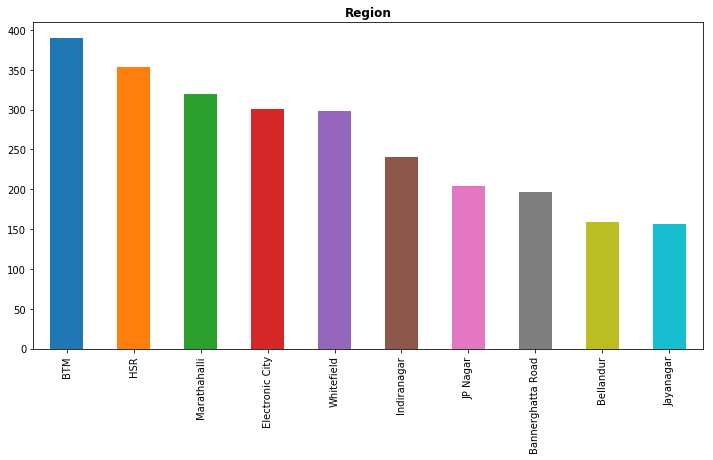

In [10]:
plt.figure(figsize=(12,6)) 
data['Region'].value_counts()[:10].plot(kind = 'bar')
plt.title('Region', weight = 'bold')

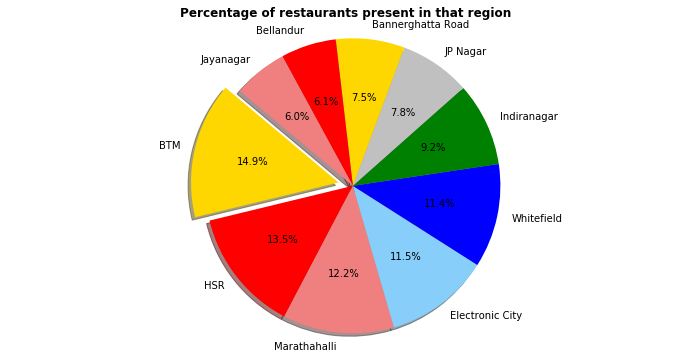

In [11]:
plt.figure(figsize = (12,6))
names = data['Region'].value_counts()[:10].index
values = data['Region'].value_counts()[:10].values
colors = ['gold', 'red', 'lightcoral', 'lightskyblue','blue','green','silver']
explode = (0.1, 0, 0, 0,0,0,0,0,0,0)  # explode 1st slice

plt.pie(values, explode=explode, labels=names, colors=colors,autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title("Percentage of restaurants present in that region", weight = 'bold')


plt.show()

In [12]:
data['Rating_Types'].value_counts().head(10)

Good         2845
Average      2141
Very Good    1014
Excellent      70
Poor           20
Muy Bueno       3
Baik            2
Muito bom       2
Excelente       2
Promedio        2
Name: Rating_Types, dtype: int64

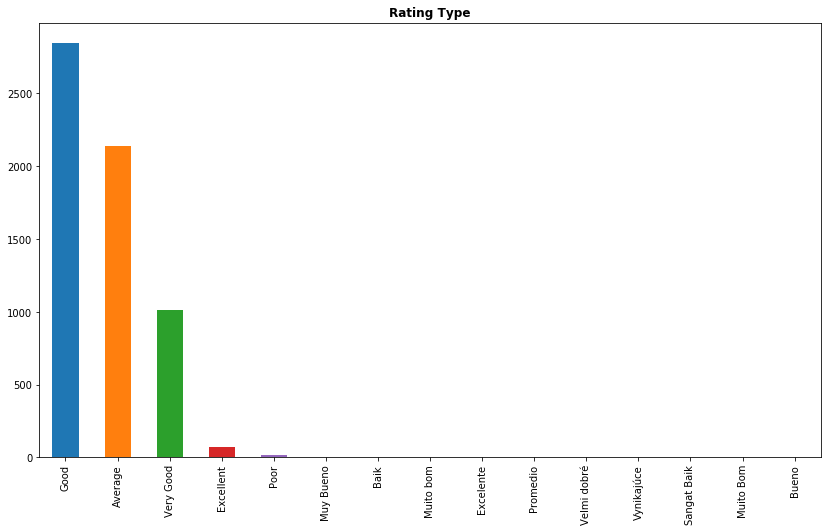

In [13]:
plt.figure(figsize = (14,8))
data.Rating_Types.value_counts()[:15].plot(kind = 'bar')
plt.title('Rating Type', weight = 'bold')
plt.show()

# Cuisine Types

In [14]:
data['Cuisine_Type'].value_counts().head(10)

Quick Bites       2767
Casual Dining     1488
none               705
Café               341
Dessert Parlor     183
Bakery             154
Beverage Shop      133
Sweet Shop          66
Food Court          63
Bar                 45
Name: Cuisine_Type, dtype: int64

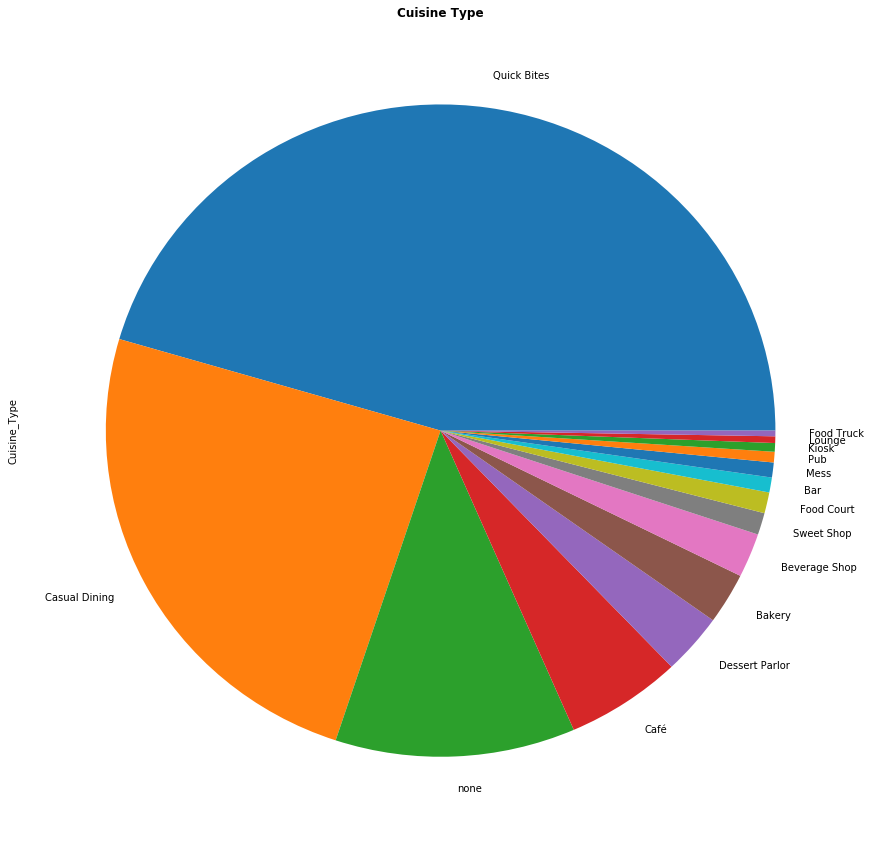

In [16]:
plt.figure(figsize = (15,15))
data.Cuisine_Type.value_counts()[:15].plot(kind = 'pie')
plt.title('Cuisine Type', weight = 'bold')
plt.show()

In [17]:
#We have the most frequently visited Restaurant type - Quickbites

# Ratings

In [18]:
data['Rating'] = data['Rating'].replace('NEW',np.NaN)
data['Rating'] = data['Rating'].replace('-',np.NaN)
data.dropna(how = 'any', inplace = True)

In [19]:
data['Rating'] = data.loc[:,'Rating'].replace('[ ]','',regex = True)
data['Rating'] = data['Rating'].astype(str)
data['Rating'] = data['Rating'].apply(lambda r: r.replace('/5',''))
data['Rating'] = data['Rating'].apply(lambda r: float(r))

3.593343171011635


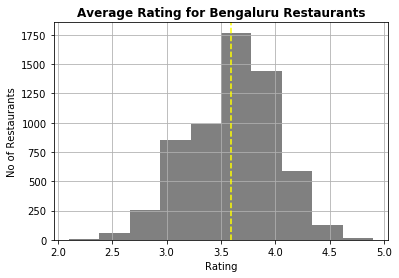

In [20]:
data.Rating.hist(color='grey')
plt.axvline(x= data.Rating.mean(),ls='--',color='yellow')
plt.title('Average Rating for Bengaluru Restaurants',weight='bold')
plt.xlabel('Rating')
plt.ylabel('No of Restaurants')
print(data.Rating.mean())

In [21]:
#Average rating per restaurant in Ajmer is found to be around 3.5

# Top cuisines in Bengaluru 

In [22]:
cuisines_count= []

for i in data.Cuisine_Category:
    for j in i.split(','):
        j = j.strip()
        cuisines_count.append(j)

Text(0,0.5,'No of restaurants')

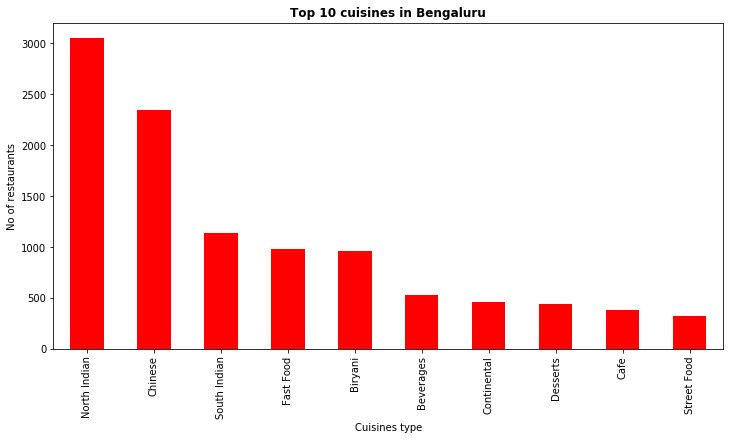

In [23]:
plt.figure(figsize=(12,6)) 
pd.Series(cuisines_count).value_counts()[:10].plot(kind='bar',color= 'r')
plt.title('Top 10 cuisines in Bengaluru',weight='bold')
plt.xlabel('Cuisines type')
plt.ylabel('No of restaurants')

# Average Cost

In [24]:
data['Price'].value_counts()[:20]

300     1055
400      922
500      631
200      548
600      453
250      375
350      280
700      268
800      245
450      214
150      204
1000     128
550      119
100      117
650       98
750       83
1200      70
900       63
1500      44
1100      35
Name: Price, dtype: int64

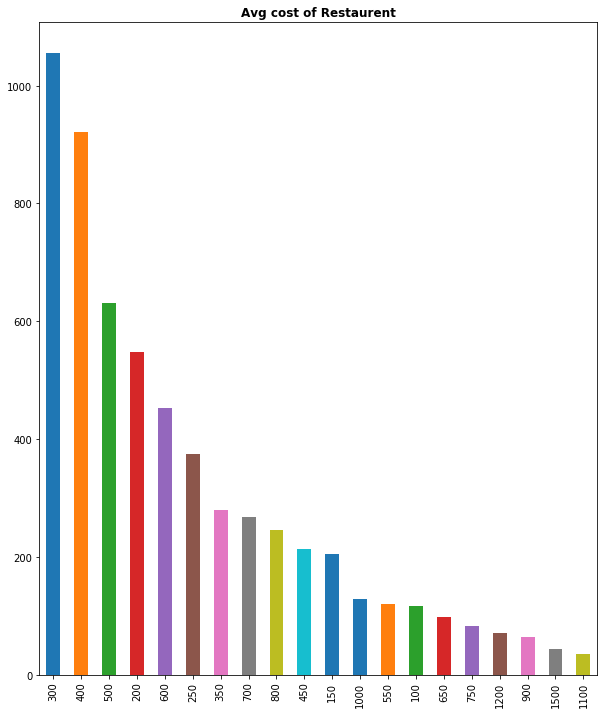

In [25]:
plt.figure(figsize = (10,12))
data['Price'].value_counts()[:20].plot(kind = 'bar')
plt.title('Avg cost of Restaurent', weight = 'bold')
plt.show()

In [26]:
colors  = ("red", "green", "orange", "cyan", "brown", "grey", "blue", "indigo", "beige", "yellow")

Text(0.5,1,'Average cost for 2 people in Rupees')

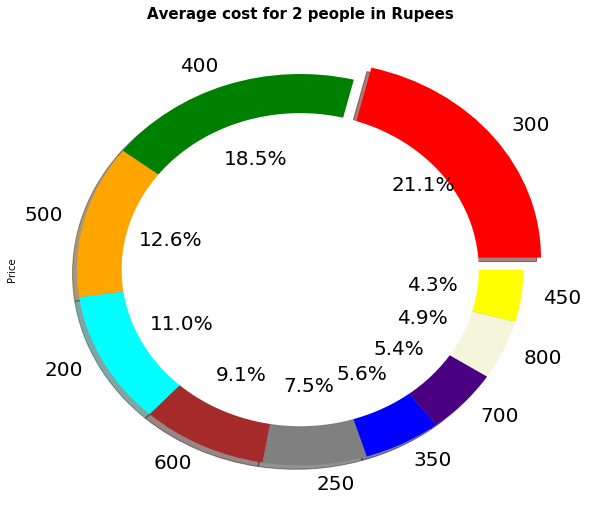

In [27]:
fig= plt.figure(figsize=(10, 9))
explode = (0.1, 0, 0, 0,0,0,0,0,0,0) 

delplot = data['Price'].value_counts()[:10].plot(kind = 'pie',autopct='%1.1f%%',fontsize=20,shadow=True,explode = explode,colors = colors)

#draw circle
centre_circle = plt.Circle((0,0),0.80,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title("Average cost for 2 people in Rupees",fontsize = 15,weight = 'bold')

#This implies that the average price of the restaurant is 300